In [ ]:
# This file is to simulate EEBED with three nodes.
# Because the EEBED with three nodes requires two logical entanglements, which means that we need to implement two groups of EE (four decoders and four decouplers) in a single circuit for simulation, which makes the required number of q-gates and qubits exceeds the ability of qiskit. In such a case, qiskit will require a lot of memory and computing resources as well as time and may throw the error "a circuit requires more memory than max_memory_mb".
# Therefore, regarding the limitation of experimental conditions, we take a compromise approach, that is, only implement one group EE (i.e., one logical entanglement pair), and the remaining one entanglement is  "pseudo-logical entanglement" (i.e., physical entanglement pair). However, we adjust the "pseudo-logical entanglement" parameters according to the same case of the logical entanglement. For example, when we test the case of only one physical entanglement totally decohere between adjacent repeaters, we will not adjust the noise value of the "pseudo-logical entanglement" (because we know that the logical entanglement pair can resist one physical entanglement decoherence).
# We have tested and proved that "when only one physical entanglement is invalid in EE (other entanglements are perfect), the fidelity of decoded entanglement is 1.", which is the direct reason for the effectiveness of EEBED.
# We should note that unlike the EE Based D-CNOT, EEBED required an encoding circuit (i.e., two CNOT gates between q1,q2 and q3 in this 3-entanglement EE case). This is because in EE Based D-CNOT, the quantum gates that come with D-CNOT can replace the function of the encoding circuit, which is not the case in EEBED.

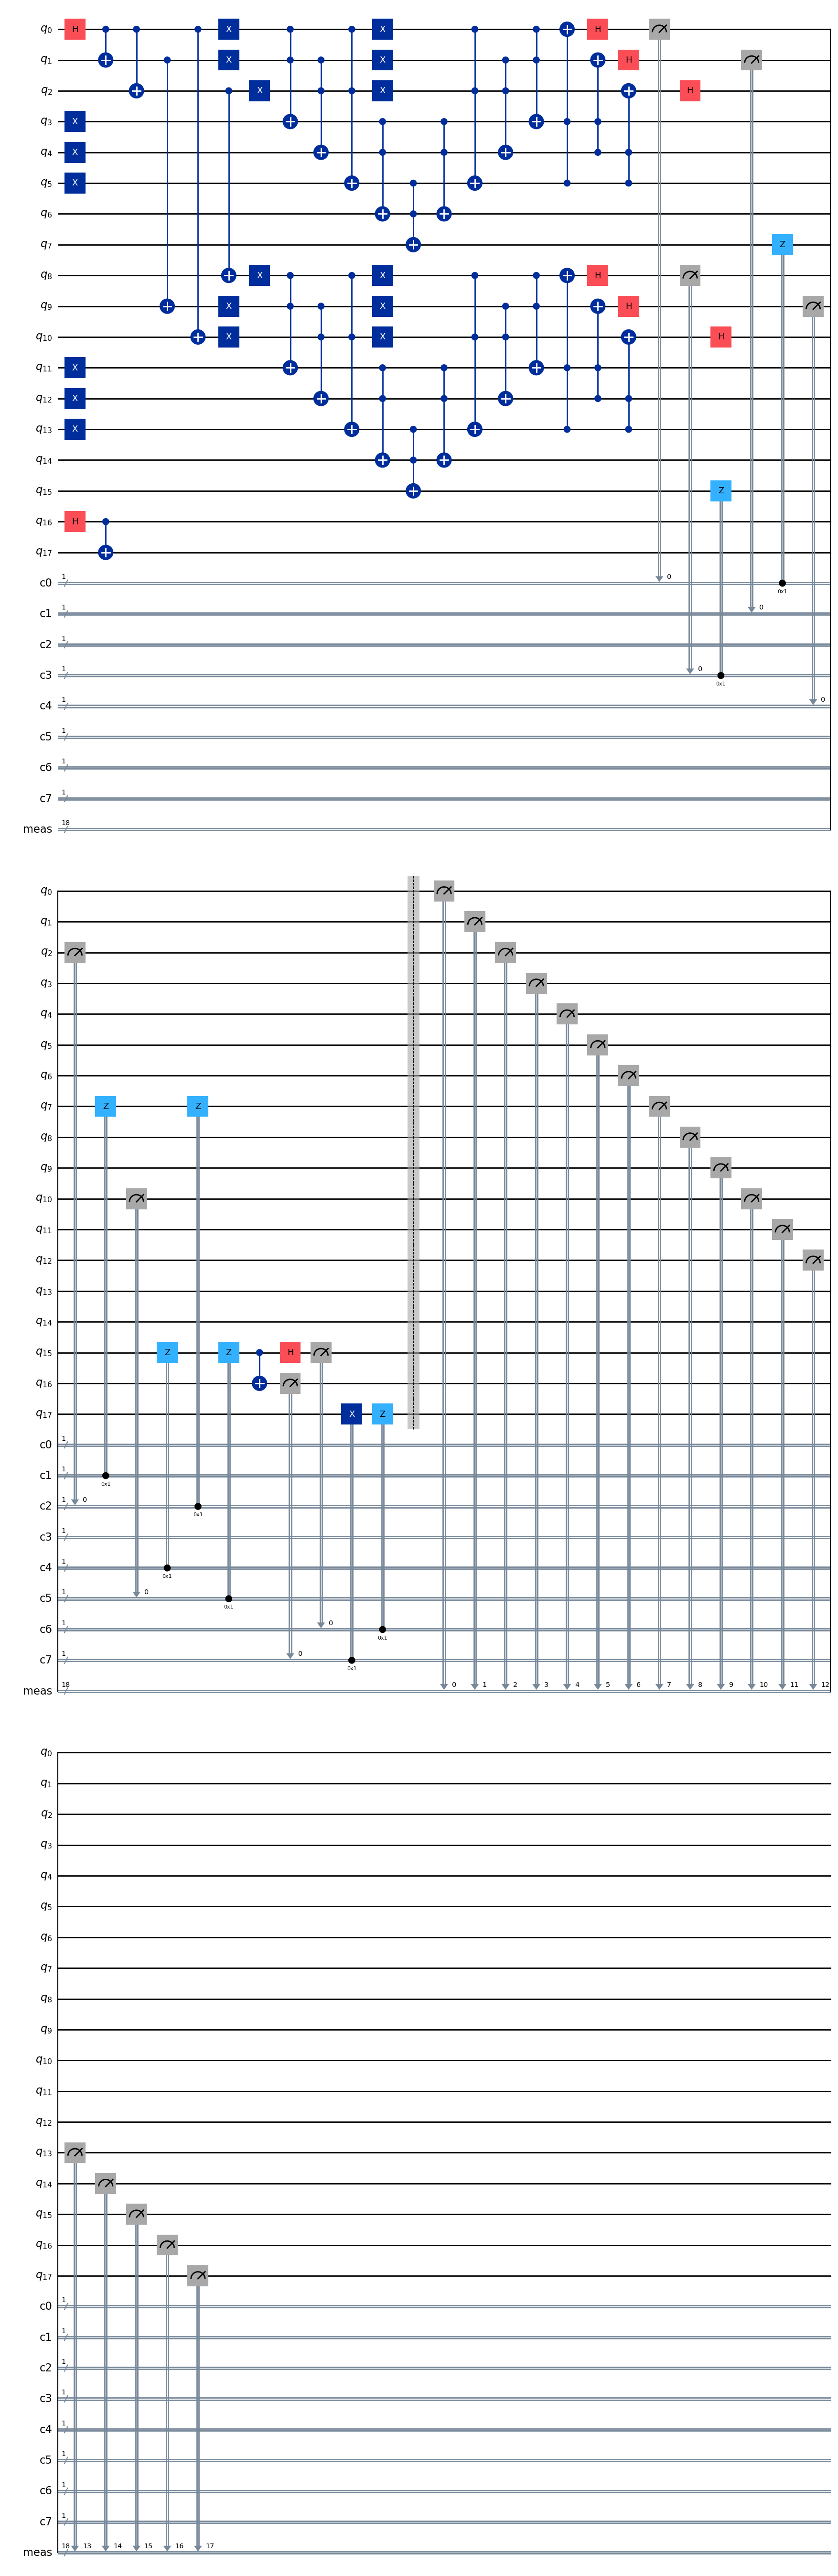

In [2]:
# This code cell is to define the circuit of EEBED(3_nodes).
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
    phase_amplitude_damping_error,
)
qreg_q = QuantumRegister(18, 'q')
creg_c0 = ClassicalRegister(1, 'c0')
creg_c1 = ClassicalRegister(1, 'c1')
creg_c2 = ClassicalRegister(1, 'c2')
creg_c3 = ClassicalRegister(1, 'c3')
creg_c4 = ClassicalRegister(1, 'c4')
creg_c5 = ClassicalRegister(1, 'c5')
creg_c6 = ClassicalRegister(1, 'c6')
creg_c7 = ClassicalRegister(1, 'c7')
circuit = QuantumCircuit(qreg_q, creg_c0, creg_c1, creg_c2, creg_c3, creg_c4, creg_c5, creg_c6, creg_c7)

circuit.h(qreg_q[0])
circuit.x(qreg_q[3])
circuit.x(qreg_q[4])
circuit.x(qreg_q[5])
circuit.x(qreg_q[11])
circuit.x(qreg_q[12])
circuit.x(qreg_q[13])
circuit.h(qreg_q[16])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[16], qreg_q[17])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[9])
circuit.cx(qreg_q[0], qreg_q[10])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.cx(qreg_q[2], qreg_q[8])
circuit.x(qreg_q[9])
circuit.x(qreg_q[10])
circuit.x(qreg_q[2])
circuit.x(qreg_q[8])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
circuit.ccx(qreg_q[8], qreg_q[9], qreg_q[11])
circuit.ccx(qreg_q[1], qreg_q[2], qreg_q[4])
circuit.ccx(qreg_q[9], qreg_q[10], qreg_q[12])
circuit.ccx(qreg_q[0], qreg_q[2], qreg_q[5])
circuit.ccx(qreg_q[8], qreg_q[10], qreg_q[13])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])
circuit.ccx(qreg_q[3], qreg_q[4], qreg_q[6])
circuit.x(qreg_q[8])
circuit.x(qreg_q[9])
circuit.x(qreg_q[10])
circuit.ccx(qreg_q[11], qreg_q[12], qreg_q[14])
circuit.ccx(qreg_q[5], qreg_q[6], qreg_q[7])
circuit.ccx(qreg_q[13], qreg_q[14], qreg_q[15])
circuit.ccx(qreg_q[3], qreg_q[4], qreg_q[6])
circuit.ccx(qreg_q[11], qreg_q[12], qreg_q[14])
circuit.ccx(qreg_q[0], qreg_q[2], qreg_q[5])
circuit.ccx(qreg_q[8], qreg_q[10], qreg_q[13])
circuit.ccx(qreg_q[1], qreg_q[2], qreg_q[4])
circuit.ccx(qreg_q[9], qreg_q[10], qreg_q[12])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
circuit.ccx(qreg_q[8], qreg_q[9], qreg_q[11])
circuit.ccx(qreg_q[3], qreg_q[5], qreg_q[0])
circuit.ccx(qreg_q[11], qreg_q[13], qreg_q[8])
circuit.ccx(qreg_q[3], qreg_q[4], qreg_q[1])
circuit.ccx(qreg_q[11], qreg_q[12], qreg_q[9])
circuit.ccx(qreg_q[4], qreg_q[5], qreg_q[2])
circuit.ccx(qreg_q[12], qreg_q[13], qreg_q[10])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[8])
circuit.h(qreg_q[9])
circuit.h(qreg_q[10])
circuit.measure(qreg_q[0], creg_c0[0])
circuit.measure(qreg_q[1], creg_c1[0])
circuit.measure(qreg_q[2], creg_c2[0])
circuit.z(qreg_q[7]).c_if(creg_c0, 1)
circuit.z(qreg_q[7]).c_if(creg_c1, 1)
circuit.z(qreg_q[7]).c_if(creg_c2, 1)
circuit.measure(qreg_q[8], creg_c3[0])
circuit.measure(qreg_q[9], creg_c4[0])
circuit.measure(qreg_q[10], creg_c5[0])
circuit.z(qreg_q[15]).c_if(creg_c3, 1)
circuit.z(qreg_q[15]).c_if(creg_c4, 1)
circuit.z(qreg_q[15]).c_if(creg_c5, 1)
circuit.cx(qreg_q[15], qreg_q[16])
circuit.h(qreg_q[15])
circuit.measure(qreg_q[15], creg_c6[0])
circuit.measure(qreg_q[16], creg_c7[0])
circuit.x(qreg_q[17]).c_if(creg_c7, 1)
circuit.z(qreg_q[17]).c_if(creg_c6, 1)
circuit.measure_all()
#circuit.draw("mpl")

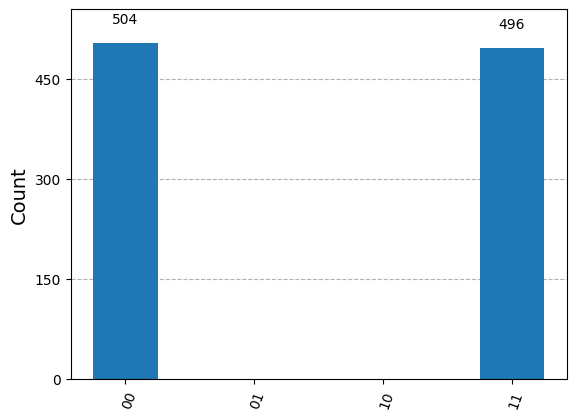

In [3]:
# This code cell is to simulate the ideal case(without noise)
# Repeately exec circuit for 1000 times.
# The result shows the probability of case:00 + case:11 is 100% which means that the final long-distance entanglement is totally entangled. (ED success rate is 100%)
# If case:00 + case:11 is not 100% which means ED success rate is not 100%.
# Especially, if case:00 +case:11 is only 50% which means the final long-distance entanglement is totally decoherent or totally decoupled. (ED success rate is 0%.)

sim_ideal = AerSimulator(max_memory_mb=65536)
counts = sim_ideal.run(circuit,shots=1000).result().get_counts()
target_qubits_counts = {'00': 0, '01': 0,'10': 0,'11': 0}
for outcome, count in counts.items():
    target_qubits = outcome[10]+outcome[0]  # choose q7(outcome[10]) and q17(outcome[0])
    target_qubits_counts[target_qubits] += count
plot_histogram(target_qubits_counts)

/Users/ben/Library/Python/3.8/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


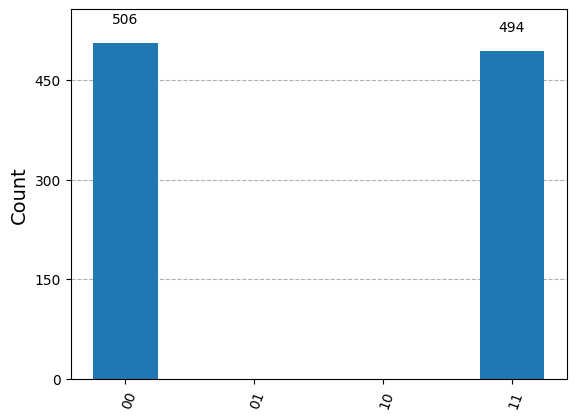

In [4]:
# This code cell is to simulate realistic cases (with noise)(one physical entanglement is totally decoherence(i.e., p_depo_010=1), while another two entanglement are perfect(i.e., p_depo_19=0, and p_depo_28=0)
# You can also adjust p_depo_19 and p_depo_28 to control the noise on another two entanglement to simulate the case that one physical entanglement is totally decoherence, while another two entanglement are suffered the same level of noise.
p_depo_010 = 1  # depolarizing error probability
p_depo_19 = 0
p_depo_28 = 0

# QuantumError objects
depol_noise_q0q10 = depolarizing_error(p_depo_010, 2)
depol_noise_q1q9 = depolarizing_error(p_depo_19, 2)
depol_noise_q2q8 = depolarizing_error(p_depo_28, 2)

# Create noisy simulator backend
noise_set = NoiseModel()
noise_set.add_quantum_error(depol_noise_q0q10, ['cx'], [0,10])
noise_set.add_quantum_error(depol_noise_q1q9, ['cx'], [1,9])
noise_set.add_quantum_error(depol_noise_q2q8, ['cx'], [2,8])
sim_noise = AerSimulator(noise_model=noise_set)

# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(optimization_level=3, backend=sim_noise)
circuit_tnoise = passmanager.run(circuit)

#Run and get counts
counts = sim_noise.run(circuit,shots=1000).result().get_counts()
target_qubits_counts = {'00': 0, '01': 0,'10': 0,'11': 0}
for outcome, count in counts.items():
    target_qubits = outcome[10]+outcome[0]  # choose q7(outcome[10]) and q17(outcome[0])
    target_qubits_counts[target_qubits] += count
plot_histogram(target_qubits_counts)